1. Import claims_data.csv and cust_data.csv which is provided to you and
combine the two datasets appropriately to create a 360-degree view of
the data. Use the same for the subsequent questions.
2. Perform a data audit for the datatypes and find out if there are any
mismatch within the current datatypes of the columns and their
business significance.
3. Convert the column claim_amount to numeric. Use the appropriate
modules/attributes to remove the $ sign.
4. Of all the injury claims, some of them have gone unreported with the
police. Create an alert flag (1,0) for all such claims.
5. One customer can claim for insurance more than once and in each claim,
multiple categories of claims can be involved. However, customer ID
should remain unique.
Retain the most recent observation and delete any duplicated records in
the data based on the customer ID column.
6. Check for missing values and impute the missing values with an
appropriate value. (mean for continuous and mode for categorical)
7. Calculate the age of customers in years. Based on the age, categorize the
customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60
8. What is the average amount claimed by the customers from various
segments?
9. What is the total claim amount based on incident cause for all the claims
that have been done at least 20 days prior to 1st of October, 2018.
10. How many adults from TX, DE and AK claimed insurance for driver
related issues and causes?
11. Draw a pie chart between the aggregated value of claim amount based
on gender and segment. Represent the claim amount as a percentage on
the pie chart.
AnalytixLabs, Website: www.analytixlabs.co.in Email: info@analytixlabs.co.inPhone: (+91) 955.521.9007
12. Among males and females, which gender had claimed the most for any
type of driver related issues? E.g. This metric can be compared using a
bar chart
13. Which age group had the maximum fraudulent policy claims? Visualize
it on a bar chart.
14. Visualize the monthly trend of the total amount that has been claimed
by the customers. Ensure that on the “month” axis, the month is in a
chronological order not alphabetical order.
15. What is the average claim amount for gender and age categories and
suitably represent the above using a facetted bar chart, one facet that
represents fraudulent claims and the other for non-fraudulent claims.
Based on the conclusions from exploratory analysis as well as suitable
statistical tests, answer the below questions. Please include a detailed
write-up on the parameters taken into consideration, the Hypothesis
testing steps, conclusion from the p-values and the business implications of
the statements.
16. Is there any similarity in the amount claimed by males and females?
17. Is there any relationship between age category and segment?
18. The current year has shown a significant rise in claim amounts as
compared to 2016-17 fiscal average which was $10,000.
19. Is there any difference between age groups and insurance claims?
20. Is there any relationship between total number of policy claims and the
claimed amount?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import where
%matplotlib inline

In [2]:
claim = pd.read_csv("claims.csv")
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [3]:
cust_info = pd.read_csv("cust_demographics.csv")
cust_info.rename(columns = {"CUST_ID":"customer_id"},inplace = True)

In [4]:
cust_db = claim.merge(cust_info,on=["customer_id"])
cust_db

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No,Female,07-Jul-96,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No,Male,11-Apr-90,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No,Female,22-Oct-64,LA,469-345-5617,Silver


In [5]:
cust_db.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [6]:
cust_db["DateOfBirth"] = pd.to_datetime(cust_db.DateOfBirth)
cust_db.loc[cust_db.DateOfBirth.dt.year>2022,"DateOfBirth"] = cust_db[cust_db.DateOfBirth.dt.year>2022].DateOfBirth.apply(lambda x: x - pd.DateOffset(years=100))
cust_db["claim_date"] = pd.to_datetime(cust_db.claim_date)


cust_db.loc[cust_db.claim_date.dt.year>2022].claim_date = cust_db[cust_db.claim_date.dt.year>2022].claim_date.apply(lambda x: x - pd.DateOffset(years=100))
cust_db.loc[(cust_db.claim_date.dt.year<cust_db.DateOfBirth.dt.year)][["claim_date","DateOfBirth"]]

cust_db["claim_amount"] = cust_db["claim_amount"].astype(str).apply(lambda x: x.strip('$')).astype(float)
cust_db

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22,LA,469-345-5617,Silver


In [7]:
# np.where()
cust_db["flag"] = np.where((cust_db.claim_type=='Injury only')|(cust_db.claim_type== 'Material and injury')&(cust_db.police_report == "No"), 0 ,
                    np.where((cust_db.claim_type=='Injury only')|(cust_db.claim_type== 'Material and injury')&(cust_db.police_report == "Yes"), 1, np.nan))
# cust_db.insert(2, "Alert",[0]*cust_db.size)
# cust_db.iloc[np.where((cust_db.claim_type=='Injury only')|(cust_db.claim_type== 'Material and injury')&(cust_db.police_report == "Yes"))]
cust_db


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,NaN
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,NaN
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,NaN
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,NaN
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,NaN
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,NaN
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,0.0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,1964-10-22,LA,469-345-5617,Silver,NaN


In [8]:
cust_db = cust_db.sort_values(["claim_date"]).drop_duplicates(["customer_id"],keep='last')
cust_db

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag
739,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,Male,1971-03-03,NE,783-653-9163,Gold,NaN
181,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,Female,1994-07-24,MA,612-684-5472,Platinum,0.0
312,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,Male,1975-11-23,NC,651-379-2486,Silver,0.0
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,Female,1993-08-13,TN,396-973-2531,Gold,0.0
120,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,Male,1965-01-10,LA,615-154-3516,Gold,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,Female,1976-05-20,NE,271-123-1475,Gold,NaN
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08,ME,134-785-1687,Gold,0.0
226,49735712,17682060,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,Female,1974-11-21,NV,186-195-3465,Gold,NaN
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,Male,1964-04-22,VA,286-128-6132,Platinum,NaN


In [9]:
cust_db.isna().sum()

claim_id                 0
customer_id              0
incident_cause           0
claim_date               0
claim_area               0
police_report            0
claim_type               0
claim_amount            65
total_policy_claims     10
fraudulent               0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
flag                   732
dtype: int64

In [10]:
# cust_db.claim_amount.loc[cust_db.claim_amount.isna()] =np.where(cust_db.claim_amount.isna(),cust_db.claim_amount.mean(),cust_db.claim_amount) 
cust_db.claim_amount.fillna(cust_db.claim_amount.mean(),inplace =True)
cust_db.total_policy_claims.fillna(cust_db.total_policy_claims.mode())

739     1.0
181     1.0
312     3.0
905     1.0
120     1.0
       ... 
354     1.0
286     1.0
226     1.0
1077    1.0
1055    1.0
Name: total_policy_claims, Length: 1078, dtype: float64

In [11]:
cust_db["Age"]=((cust_db.claim_date - cust_db.DateOfBirth).apply(lambda x: x.days)/365).astype(int)
cust_db

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age
739,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,Male,1971-03-03,NE,783-653-9163,Gold,NaN,45
181,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,Female,1994-07-24,MA,612-684-5472,Platinum,0.0,22
312,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,Male,1975-11-23,NC,651-379-2486,Silver,0.0,41
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,Female,1993-08-13,TN,396-973-2531,Gold,0.0,23
120,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,Male,1965-01-10,LA,615-154-3516,Gold,NaN,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,Female,1976-05-20,NE,271-123-1475,Gold,NaN,42
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08,ME,134-785-1687,Gold,0.0,51
226,49735712,17682060,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,Female,1974-11-21,NV,186-195-3465,Gold,NaN,43
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,Male,1964-04-22,VA,286-128-6132,Platinum,NaN,54


In [12]:
cust_db['Age'] = pd.cut(cust_db['Age'], [0,18,30,60,100],labels = ["Children","Youth","Adult","Senior"]).astype(str)
cust_db.reset_index(drop=True)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age
0,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,Male,1971-03-03,NE,783-653-9163,Gold,NaN,Adult
1,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,Female,1994-07-24,MA,612-684-5472,Platinum,0.0,Youth
2,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,Male,1975-11-23,NC,651-379-2486,Silver,0.0,Adult
3,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,Female,1993-08-13,TN,396-973-2531,Gold,0.0,Youth
4,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,Male,1965-01-10,LA,615-154-3516,Gold,NaN,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,Female,1976-05-20,NE,271-123-1475,Gold,NaN,Adult
1074,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08,ME,134-785-1687,Gold,0.0,Adult
1075,49735712,17682060,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,Female,1974-11-21,NV,186-195-3465,Gold,NaN,Adult
1076,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,Male,1964-04-22,VA,286-128-6132,Platinum,NaN,Adult


In [13]:
cust_db.groupby(by="Segment")["claim_amount"].mean()

Segment
Gold        12846.400227
Platinum    12371.654843
Silver      12267.859374
Name: claim_amount, dtype: float64

In [14]:
cust_db[cust_db.claim_date <"2018-09-10"].groupby(by="incident_cause")["claim_amount"].sum().astype(int)


incident_cause
Crime                  721938
Driver error          3315850
Natural causes        1312987
Other causes          3723151
Other driver error    3277536
Name: claim_amount, dtype: int32

In [15]:
cust_db[cust_db.Age == "Adult"][(cust_db.State == "TX")|(cust_db.State == "DE")|(cust_db.State == "AK")][cust_db.incident_cause.str.lower().str.contains("driver")].groupby(by = "State")["State"].count()

C:\Users\jitai\AppData\Local\Temp\ipykernel_1372\744555106.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cust_db[cust_db.Age == "Adult"][(cust_db.State == "TX")|(cust_db.State == "DE")|(cust_db.State == "AK")][cust_db.incident_cause.str.lower().str.contains("driver")].groupby(by = "State")["State"].count()


State
AK    8
DE    9
TX    6
Name: State, dtype: int64

In [16]:
cust_pv = cust_db.pivot_table(index = ["Segment"],columns = ["gender"], values = "claim_amount",aggfunc ="sum")
cust_pv

gender,Female,Male
Segment,,
Gold,2.110045e+06,2.655970e+06
Platinum,2.369722e+06,2.096445e+06
Silver,1.897545e+06,2.347134e+06


array([<AxesSubplot:ylabel='Female'>, <AxesSubplot:ylabel='Male'>],
      dtype=object)

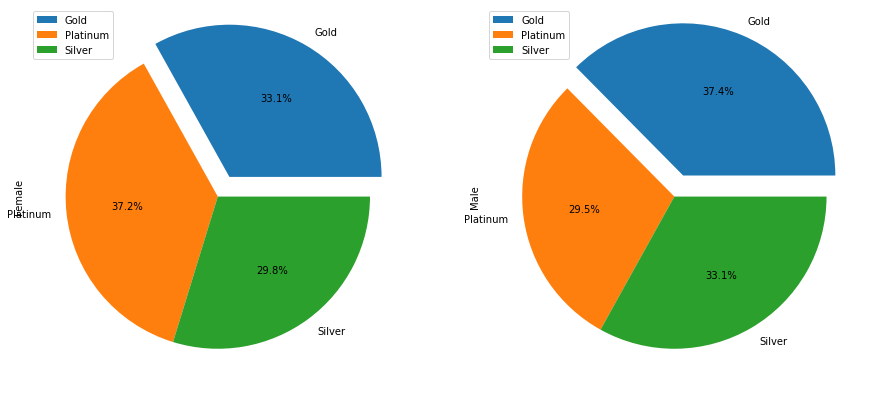

In [17]:
cust_pv.plot(kind = "pie", subplots = True, legend = True, figsize = (15,8),autopct='%1.1f%%',explode=(0.15, 0, 0))

<AxesSubplot:xlabel='gender'>

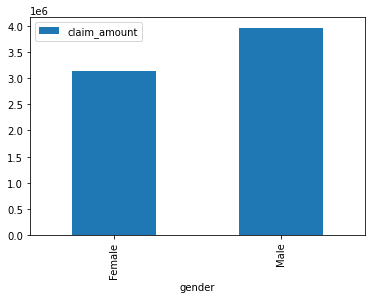

In [18]:
cust_db[cust_db.incident_cause.str.lower().str.contains("driver")][["gender","claim_amount"]].groupby(by="gender").sum().plot(kind="bar")

<AxesSubplot:xlabel='Age'>

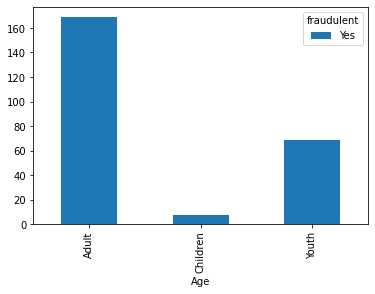

In [19]:
cust_db[cust_db["fraudulent"]=="Yes"].pivot_table(index = ["Age"],columns = ["fraudulent"],aggfunc ="count")["claim_id"].plot(kind = "bar")

In [20]:
cust_db["customer_id"].unique()

array([29323970, 61745840, 65176092, ..., 17682060, 65208809, 58451506],
      dtype=int64)

In [21]:
cust_db["Monthly"]  = cust_db["claim_date"].dt.month
cust_db["Yearly"]  = cust_db["claim_date"].dt.year
cust_db

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,Age,Monthly,Yearly
739,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.0,1.0,Yes,Male,1971-03-03,NE,783-653-9163,Gold,NaN,Adult,1,2017
181,90591192,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.0,1.0,No,Female,1994-07-24,MA,612-684-5472,Platinum,0.0,Youth,1,2017
312,9476314,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.0,3.0,No,Male,1975-11-23,NC,651-379-2486,Silver,0.0,Adult,1,2017
905,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,Female,1993-08-13,TN,396-973-2531,Gold,0.0,Youth,1,2017
120,39131766,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.0,1.0,Yes,Male,1965-01-10,LA,615-154-3516,Gold,NaN,Adult,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,Female,1976-05-20,NE,271-123-1475,Gold,NaN,Adult,10,2018
286,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,Male,1967-09-08,ME,134-785-1687,Gold,0.0,Adult,10,2018
226,49735712,17682060,Crime,2018-10-30,Home,Unknown,Material and injury,17020.0,1.0,No,Female,1974-11-21,NV,186-195-3465,Gold,NaN,Adult,10,2018
1077,91386759,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.0,1.0,No,Male,1964-04-22,VA,286-128-6132,Platinum,NaN,Adult,10,2018


###### Claim amount every month every year #####

<AxesSubplot:>

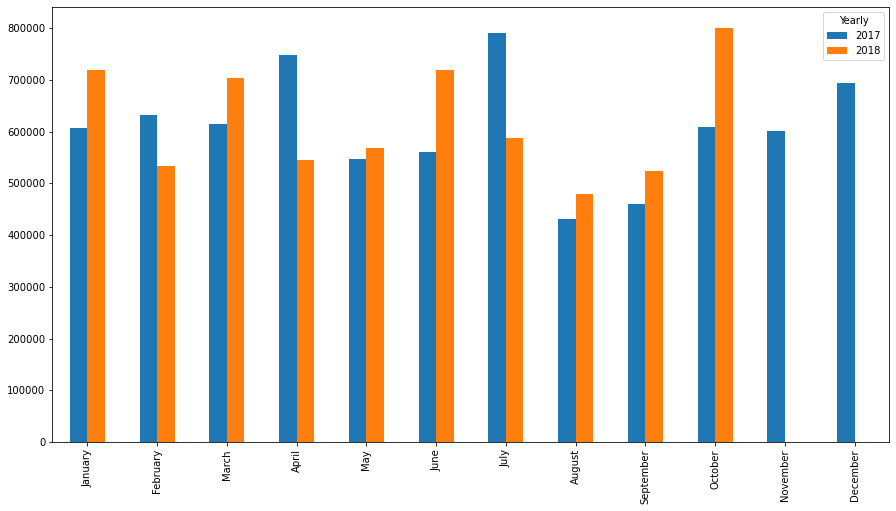

In [22]:
monthly = cust_db.pivot_table(index = ["Yearly"], columns = "Monthly",values = "claim_amount" ,aggfunc = "sum")
monthly.columns =pd.to_datetime(monthly.columns,format="%m").month_name().astype(str).to_list()
monthly.T.plot(kind = "bar",figsize =(15,8))

##### Claim amount Sum in all months #############

<AxesSubplot:>

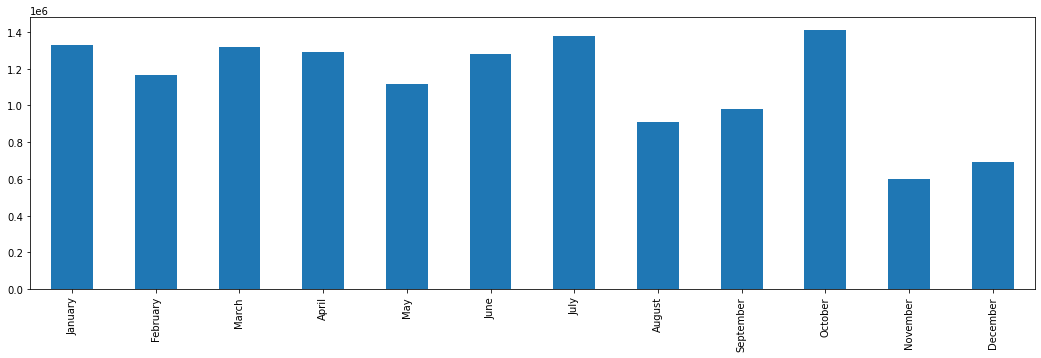

In [23]:
sum_all_month = cust_db.groupby(["Monthly"])["claim_amount"].sum()
sum_all_month.index =pd.to_datetime(sum_all_month.index,format="%m").month_name().astype(str).to_list()
sum_all_month.plot(kind= "bar",figsize =(18,5))

<AxesSubplot:xlabel='Age'>

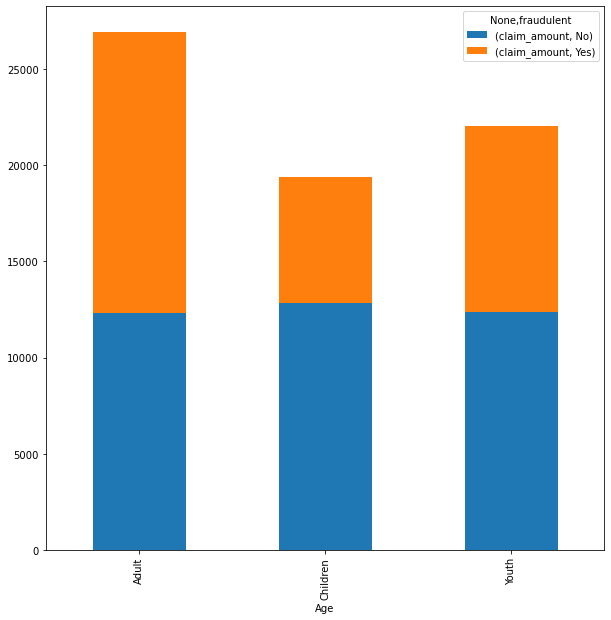

In [24]:
cust_db.pivot_table(index=["Age"],columns = ["fraudulent"],values = ["claim_amount"],aggfunc = "mean").plot(kind ="bar",stacked = True,figsize=(10,10))

<AxesSubplot:xlabel='gender'>

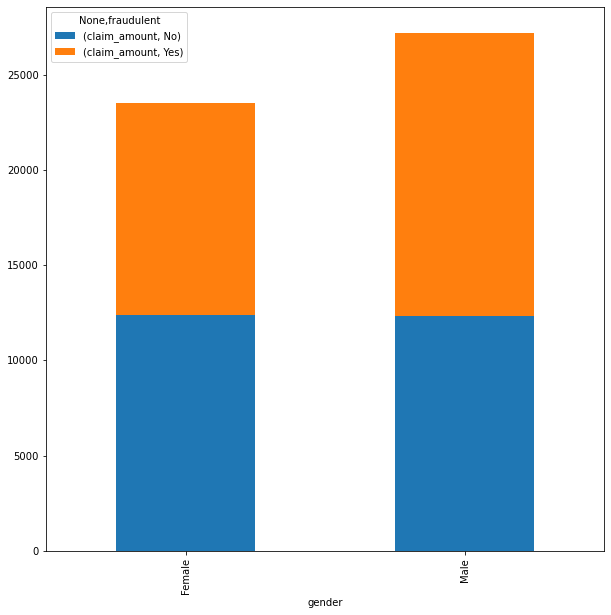

In [25]:
cust_db.pivot_table(index=["gender"],columns = ["fraudulent"],values = ["claim_amount"],aggfunc = "mean").plot(kind ="bar",stacked = True,figsize=(10,10))

<AxesSubplot:xlabel='Age,gender'>

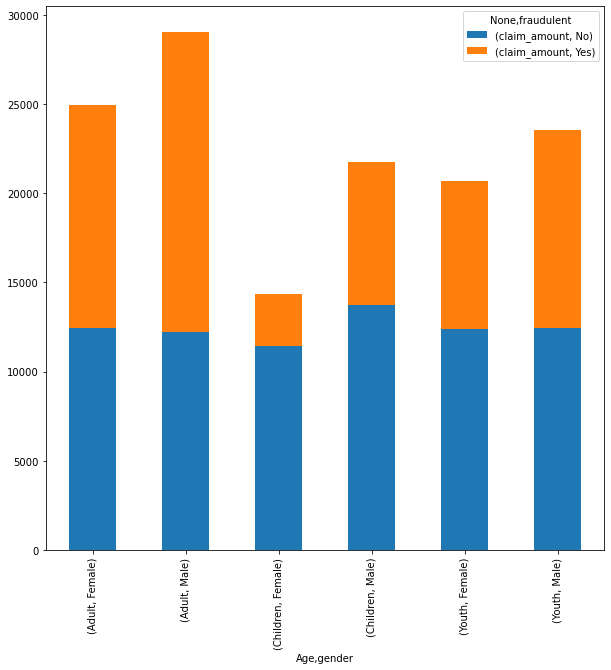

In [26]:
cust_db.pivot_table(index=["Age","gender"],columns = ["fraudulent"],values = ["claim_amount"],aggfunc = "mean").plot(kind ="bar",stacked = True,figsize=(10,10))

### 16. Test
1. find out mean of male claims
2. find out mean of female claims

In [27]:
male_m = cust_db["claim_amount"][cust_db.gender=="Male"].mean()
male_m

12884.845110657638

In [28]:
female_m = cust_db["claim_amount"][cust_db.gender=="Female"].mean()
female_m

12101.160474551885

### Hypothesis Testing 
1. Ho(Null Hypo) - There is no or very less significant difference in the claim amount of male and female i.e mean(male) = mean(female)
2. Ha(Alternate Hypo) - There is a significant difference in the claims made by male and female i.e mean(male)>mean(female) or mean(male)< mean(female)
3. Rules setting , CI - 95%,p-value - 0.05
4. Performing T test(ttest_ind because both the data is independent of each other) for finding out the confidence level or p value with which we can reject the null hypothesis

In [29]:
import scipy.stats as stats

In [30]:
eq_var = stats.ttest_ind(cust_db["claim_amount"][cust_db.gender=="Male"],cust_db["claim_amount"][cust_db.gender=="Female"])
eq_var.pvalue

0.33601006135365463

##### since the p value is 0.336 which is greater than 0.05 this means we can not reject null hypothesis and say that there is not much difference in claims made by men and women

### 17.  Create a crosstab of the categorical variable

In [31]:
seg_vs_gender = pd.crosstab(cust_db["Segment"],cust_db["Age"])
seg_vs_gender

Age,Adult,Children,Youth
Segment,,,
Gold,251,12,108
Platinum,236,9,116
Silver,233,12,101


##### Hypothesis Testing  for Categorical variables
1. Ho - There is no relation between Segment and Age
2. Ha - There is relation between segment of insurance claim and age group
3. Rules Setting, CI -95%,p value - 0.05
4. Using chi2_contigency as we have have categorical variables and a contingency table of these categorical variables

In [32]:
stats.chi2_contingency(seg_vs_gender)[1]

0.8302949799351312

##### since the p value is greater than 0.05  we can not reject the null Hypothesis

### 18. Filter claim_amount  data with respect to year

In [33]:
dat_2016_17= cust_db.loc[(cust_db.claim_date>= "1-04-2016")&(cust_db.claim_date>= "31-03-2017"),["claim_amount"]]
dat_2016_17.reset_index(drop = True,inplace =True)
dat_2016_17

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:60: UserWarning: Parsing '31-03-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)


,claim_amount
0,22540.0
1,19390.0
2,34010.0
3,2310.0
4,2050.0
...,...
910,1940.0
911,42124.5
912,17020.0
913,2290.0


In [34]:
dat_2017_18 = cust_db.loc[(cust_db.claim_date>= "1-01-2018")&(cust_db.claim_date>= "31-03-2018"),["claim_amount"]]
dat_2017_18.reset_index(drop = True,inplace =True)
dat_2017_18

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:60: UserWarning: Parsing '31-03-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.ge)


,claim_amount
0,24667.5
1,31450.0
2,1300.0
3,1460.0
4,2440.0
...,...
340,1940.0
341,42124.5
342,17020.0
343,2290.0


#### Hypothesis Testing 
1. Ho -  Avg claim_amount 2016-2017 fisical year = Avg claim_amount 2017-2018 fisical year
2. Ha -  Avg claim_amount 2016-2017 fisical year <> Avg claim_amount 2017-2018 fisical year
3. Rule Setting , CI - 95%, p-value 0.05
4. While exploring the data set found that there was mismatch in the length of data between 1 April 2016 - 31 March 2017(Fisical Year 2016 -2017) and 1 April 2016 - 31 March 2017(Fisical Year 2017 -2018) so filled the Null values with mean of the the data 
5. we will use pearson test to find the co releation as both are dependent variable 

In [35]:
# dat_2016_17.values.reshape(345,0)
comp  = pd.DataFrame(dat_2016_17).rename(columns = {"claim_amount":"2016-2017"})
comp["2017-2018"] = dat_2017_18
# comp["2017-2018"].drop()
comp["2017-2018"].fillna(comp["2017-2018"].mean(),inplace=True)
stats.pearsonr(comp["2017-2018"],comp["2016-2017"])


(-0.020261743506631385, 0.5404571554916258)

#### since th p value is 0.540 so we can not reject null hypothesis completely 

In [36]:
claim_A = cust_db.loc[cust_db.Age == "Adult","claim_amount"]
print(claim_A.mean())
claim_Y = cust_db.loc[cust_db.Age == "Youth","claim_amount"]
print(claim_Y.mean())
claim_C = cust_db.loc[cust_db.Age == "Children","claim_amount"]
# claim_C
print(claim_C.mean())

12857.407345480973
11815.170576353554
11502.954545454546


by descrtiptive Statistics we can see there is significant change in between adults and youth but not a significant change between youth and children

### 19. Hypothesis testing
1. Ho - claim made by Adult == Young == Children
2. Ha - claim made by Adult <> Young <> Children
3. Rule Setting, CI - 95% , p-value - 0.05
4. Test using Anova f_oneway test as we need to work on multiple variable

In [37]:
stats.f_oneway(claim_A,claim_Y,claim_C)

F_onewayResult(statistic=0.7758741881696146, pvalue=0.46055879989342186)

since the p-value = 0.46 we can not reject the null Hypothesis so we can not say that there is difference in all the three 

#### 20. Finding co relation between total policy claims and claimed amount 

In [38]:
cust_db.total_policy_claims.corr(cust_db.claim_amount)

-0.022028915434014265

the coreleation coffecient is negative so total policy claims and claim amount are inverly proportional but the since the value pf corelation is low so the relationship is not very strong